<a href="https://colab.research.google.com/github/zoed98/Python-Machine-Learning/blob/main/16_4Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

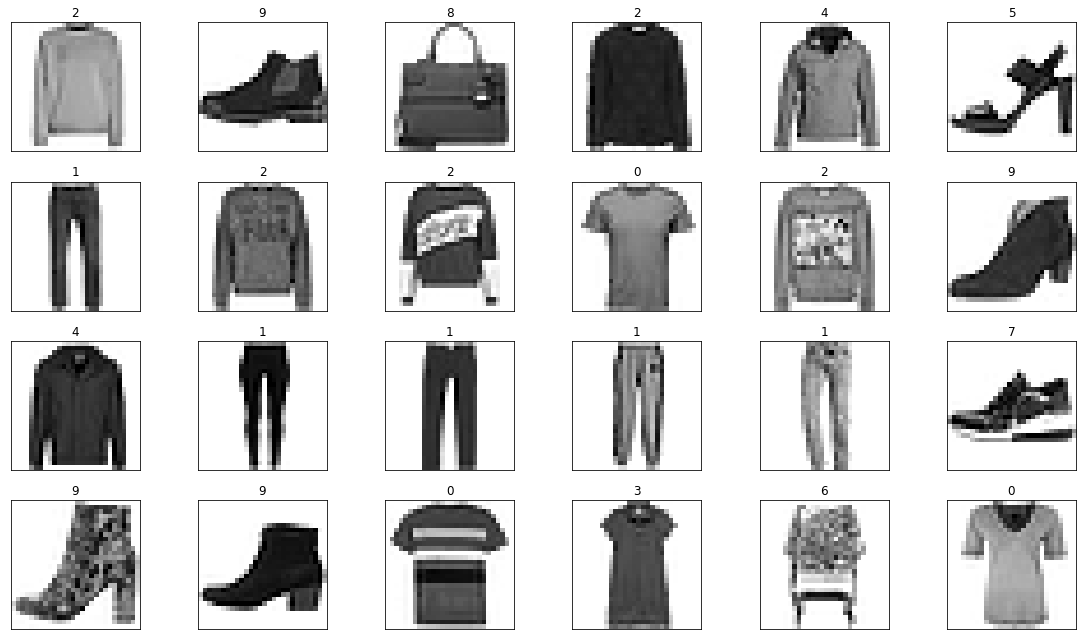

In [8]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)

plt.tight_layout()

In [9]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
X_train = X_train.astype('float32') / 255

In [14]:
X_test = X_test.astype('float32') / 255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train)

In [17]:
y_train.shape

(60000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)

In [20]:
y_test.shape

(10000, 10)

In [21]:
from tensorflow.keras.models import Sequential 

In [22]:
cnn = Sequential() 

In [23]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [24]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [25]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [27]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
cnn.add(Flatten())

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model

In [30]:
tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [31]:
cnn.add(Dense(units=128, activation='relu'))

In [32]:
cnn.add(Dense(units=10, activation='softmax'))

In [33]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

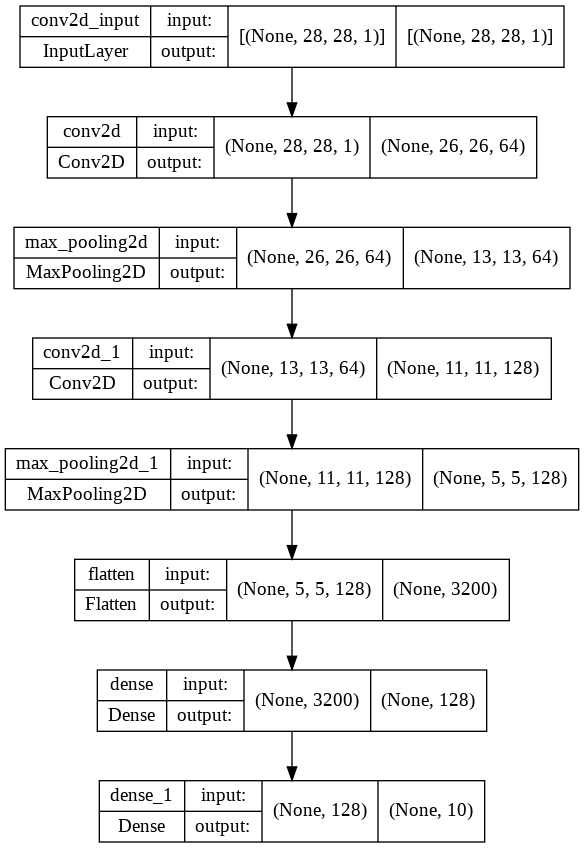

In [34]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')

In [35]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 113s 133ms/step - loss: 0.4684 - accuracy: 0.8288 - val_loss: 0.3549 - val_accuracy: 0.8688
Epoch 2/5
844/844 [==============================] - 111s 132ms/step - loss: 0.3122 - accuracy: 0.8862 - val_loss: 0.2859 - val_accuracy: 0.8975
Epoch 3/5
844/844 [==============================] - 110s 131ms/step - loss: 0.2642 - accuracy: 0.9042 - val_loss: 0.2724 - val_accuracy: 0.9027
Epoch 4/5
844/844 [==============================] - 110s 131ms/step - loss: 0.2283 - accuracy: 0.9146 - val_loss: 0.2544 - val_accuracy: 0.9083
Epoch 5/5
844/844 [==============================] - 111s 131ms/step - loss: 0.2008 - accuracy: 0.9255 - val_loss: 0.2484 - val_accuracy: 0.9095


In [37]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2564 - accuracy: 0.9071


In [38]:
loss

0.25638771057128906

In [39]:
accuracy

0.9071000218391418

In [40]:
predictions = cnn.predict(X_test)

In [41]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [42]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000081006%
1: 0.0000032735%
2: 0.0000176599%
3: 0.0000182950%
4: 0.0002643936%
5: 0.0044948993%
6: 0.0000264508%
7: 0.1003726968%
8: 0.0001277544%
9: 99.8946607113%


In [43]:
images = X_test.reshape((10000, 28, 28))

In [44]:
incorrect_predictions = []

In [45]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [46]:
len(incorrect_predictions)

929

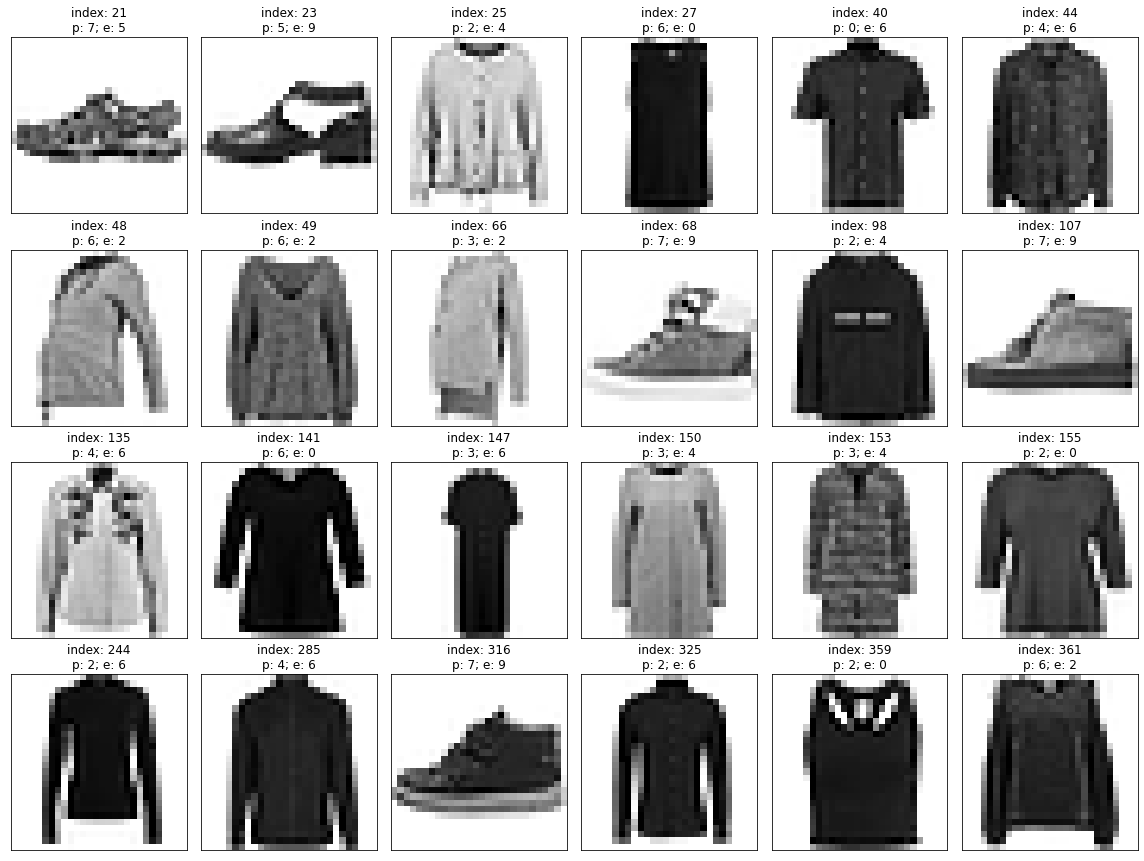

In [47]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([]) 
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [48]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [49]:
display_probabilities(predictions[340])

0: 0.0097072960%
1: 0.0033249646%
2: 6.6794849932%
3: 0.0152811903%
4: 93.0122077465%
5: 0.0000426104%
6: 0.2108984161%
7: 0.0016951401%
8: 0.0614375458%
9: 0.0059175287%


In [50]:
display_probabilities(predictions[740])

0: 0.0143097976%
1: 0.0073263567%
2: 0.0099175435%
3: 99.5712995529%
4: 0.1556658652%
5: 0.0010763723%
6: 0.2356644487%
7: 0.0018091374%
8: 0.0009351998%
9: 0.0019986937%


In [51]:
display_probabilities(predictions[1260])

0: 98.7965226173%
1: 0.0000090082%
2: 0.0966547173%
3: 0.0480405288%
4: 0.0007317959%
5: 0.0000933450%
6: 1.0573060252%
7: 0.0000207976%
8: 0.0006173876%
9: 0.0000137755%


In [52]:
cnn.save('mnist_cnn.h5')

In [53]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')